High Dimensional Data

Implement:
- PCA
- Multidimensional Scaling
- Isomap
- Multiplication by a random matrix i.e. Johnson Lindenstrauss
- Compressed Sensing
- Kmeans clustering
- Spectral clustering
- Hierarchical clustering
- Page Rank

Helper functions
- Get the eigenvalues and eigenvectors of a matrix


Helper classes
- Vector


In [139]:
import numpy as np
from scipy.linalg import norm 
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import networkx as nx
from sklearn.datasets import make_swiss_roll
matplotlib.style.use('seaborn-white')

## Principal Component Analysis

In [3]:
# Create random matrix and vectors
A = np.random.randn(10,10)
v = np.random.randn(10,1)
w = np.random.randn(10,1)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0xa24117cf8>,
      dtype=object)

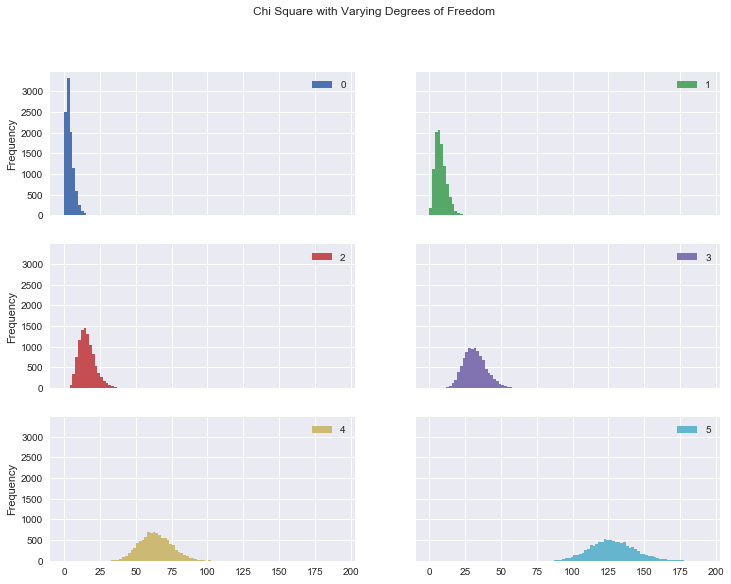

In [3]:
(pd.DataFrame([[norm(np.random.randn(p,1))**2 for _ in range(10000)] 
               for p in [2**i for i in range(2,8)]]).T
 .plot.hist(bins=100, 
            subplots=True, 
            layout=(-1,2), 
            figsize=(12,9), 
            title='Chi Square with Varying Degrees of Freedom', 
            sharey=True))


## Spectral Clustering

Original Network:
[[0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 1. 0. 1. 0.]
 [1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]




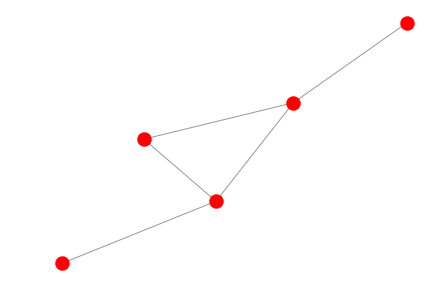

In [43]:
size = 5
sparsity = 0.15
#A = np.ceil(sp.sparse.rand(size, size, sparsity).todense())
G = nx.generators.erdos_renyi_graph(size, 0.4)
A = nx.to_numpy_matrix(G)
print('Original Network:')
print(A.round(3))
print('\n')
# Plotting
# Plot convergence
fig1, ax = plt.subplots(1,1,figsize=(7,5))
pos = nx.layout.spring_layout(G, iterations=10)
nx.draw_networkx_nodes(G, pos, node_color='Red', ax=ax, node_size=200)
nx.draw_networkx_edges(G, pos, node_size=200, alpha=0.4,
                       arrowsize=15, width=1, ax=ax)
ax.set_axis_off()
plt.show()

In [77]:
A = nx.to_numpy_matrix(G, weight=1)
L = nx.laplacian_matrix(G).todense()
D = np.diag(np.diag(L))
print(A)
print(L)
print(Lsym)
Lsym = nx.normalized_laplacian_matrix(G).todense().round(2)

[[0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1.]
 [0. 1. 0. 1. 0.]
 [1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]
[[ 1  0  0 -1  0]
 [ 0  3 -1 -1 -1]
 [ 0 -1  2 -1  0]
 [-1 -1 -1  3  0]
 [ 0 -1  0  0  1]]
[[ 1.    0.    0.   -0.58  0.  ]
 [ 0.    1.   -0.41 -0.33 -0.58]
 [ 0.   -0.41  1.   -0.41  0.  ]
 [-0.58 -0.33 -0.41  1.    0.  ]
 [ 0.   -0.58  0.    0.    1.  ]]


array([ 0.42, -0.32,  0.18, -0.32,  0.42])

In [94]:
print(np.linalg.inv(D))
print(np.sqrt(np.linalg.inv(D)) @ L @ np.sqrt(np.linalg.inv(D)))
(np.linalg.inv(D) @ L).round(3)
print()

[[ 1.          0.          0.          0.          0.        ]
 [ 0.          0.33333333  0.          0.          0.        ]
 [ 0.          0.          0.5         0.          0.        ]
 [-0.         -0.         -0.          0.33333333 -0.        ]
 [ 0.          0.          0.          0.          1.        ]]
[[ 1.          0.          0.         -0.57735027  0.        ]
 [ 0.          1.         -0.40824829 -0.33333333 -0.57735027]
 [ 0.         -0.40824829  1.         -0.40824829  0.        ]
 [-0.57735027 -0.33333333 -0.40824829  1.          0.        ]
 [ 0.         -0.57735027  0.          0.          1.        ]]



In [45]:
print(nx.laplacian_spectrum(G).round(2))
plt.plot(nx.laplacian_spectrum(G))

matrix([[ 1,  0,  0, -1,  0],
        [ 0,  3, -1, -1, -1],
        [ 0, -1,  2, -1,  0],
        [-1, -1, -1,  3,  0],
        [ 0, -1,  0,  0,  1]], dtype=int64)

In [111]:
eigvals, eigvects = (x.round(3) for x in np.linalg.eig(L))
eigvals
eigvects

array([[ 0.205,  0.195,  0.447,  0.512, -0.677],
       [ 0.677, -0.512,  0.447, -0.195,  0.205],
       [-0.   ,  0.632,  0.447, -0.632,  0.   ],
       [-0.677, -0.512,  0.447, -0.195, -0.205],
       [-0.205,  0.195,  0.447,  0.512,  0.677]])

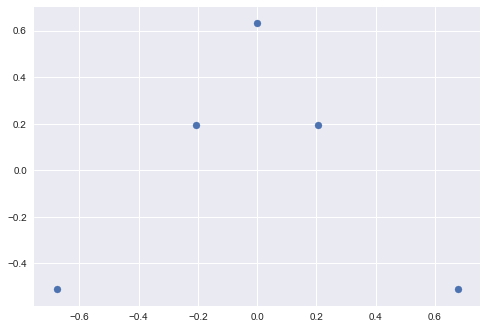

In [113]:
plt.scatter(eigvects[:,0], eigvects[:,1] )

## Swiss Roll

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from sklearn.manifold import SpectralEmbedding, Isomap, TSNE
from sklearn.datasets import make_s_curve,load_digits
#import umap

In [16]:
vect_length = lambda datum: np.sqrt(datum[2]**2 + datum[0]**2)
vect_angle = lambda datum: np.arctan(datum[2]/datum[0])

In [85]:
def data2graph(data):
    n = data.shape[0]
    print()
    
data2graph(raw_data)

array([[  6.35686809,  14.73163977,   0.75895314],
       [  0.50101104,  19.46709833, -11.02959417],
       [ -9.42879622,  15.0355525 ,  -1.95384237],
       ...,
       [ -9.44949469,   1.53952483,  -1.72091905],
       [  0.13944698,  15.05764192,  -4.73975037],
       [  1.43334144,   1.63570119,  -4.79323841]])

In [43]:
size = 1000
raw_data, manifold_distance = make_swiss_roll(size, noise=0.5)

In [13]:
def graph_swiss_roll_embeddings(raw_data, manifold_distance, embeddings):
    fig = plt.figure(figsize=(18,9))
    # Plot swiss roll
    ax = fig.add_subplot(1,2,1,projection='3d')
    ax.scatter(
        raw_data[:,0],raw_data[:,1], raw_data[:,2],
        c = manifold_distance, s = 50, cmap='cool', alpha=0.8
    );
    ax.view_init(azim=280, elev=8)
    ax.set_title('Original Data', fontdict={'fontsize': 16})
    # Plot each of the embeddings
    for i, (title, embedding) in enumerate(embeddings.items()):
        assert embedding.shape == (size, 2), f'{title} incorrect size!'
        index = (3+4*i)%12 + (3+4*i)//12
        ax = fig.add_subplot(3, 4, index)
        ax.scatter(
            embedding[:,0], embedding[:,1], 
            c = manifold_distance, s = 30, cmap='cool', alpha=0.8
        );
        ax.set_title(title, fontdict={'fontsize': 16})
    plt.tight_layout()

In [70]:
spectral = SpectralEmbedding(
    affinity='nearest_neighbors',
    #gamma = 0.15,
    n_neighbors=5, 
);
spectral_data = spectral.fit_transform(raw_data)

In [45]:
polar_data = np.concatenate(
    [np.apply_along_axis(vect_length, axis=1, arr = raw_data).reshape((-1,1)),
     np.apply_along_axis(vect_angle, axis=1, arr = raw_data).reshape((-1,1))],
    axis=1
);

In [60]:
isomap = Isomap(
    n_components=2,
    n_neighbors=8, 
);
isomap_data = isomap.fit_transform(raw_data)

In [72]:
tsne = TSNE(
    n_components=2,
    #n_neighbors=10, 
);
tsne_data = tsne.fit_transform(raw_data)

In [106]:
umap_obj = UMAP()
umap_data = umap_obj.fit_transform(raw_data)

In [31]:
lle = LocallyLinearEmbedding(n_components=2)
lle_data = lle.fit_transform(raw_data)

In [47]:
srp = SparseRandomProjection(n_components=2)
srp_data = srp.fit_transform(raw_data)

In [73]:
mds = MDS()
mds_data = mds.fit_transform(raw_data)

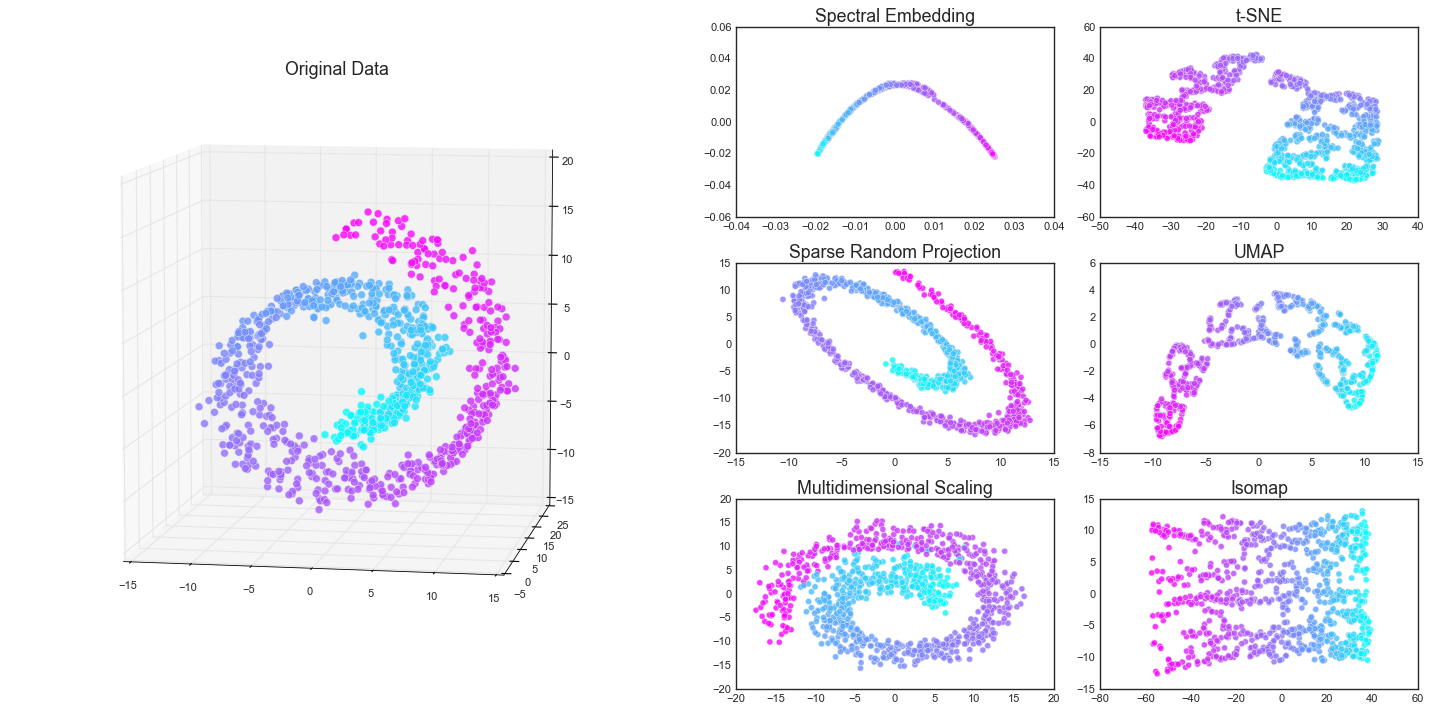

In [140]:
graph_swiss_roll_embeddings(
    raw_data, manifold_distance,
    {'Spectral Embedding': spectral_data,
     #'Polar Embedding': polar_data,
     
     #'Locally Linear Embedding': lle_data,
     'Sparse Random Projection': srp_data,
     'Multidimensional Scaling': mds_data,
     't-SNE': tsne_data,
     'UMAP': umap_data,
     'Isomap': isomap_data,
    }
);


## Digits

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import LocallyLinearEmbedding, MDS
from sklearn.random_projection import SparseRandomProjection

In [102]:
from umap import UMAP

In [83]:
digit_data, digit_class = load_digits(return_X_y=True)

In [84]:
def graph_digit_embeddings(raw_data, digit_class, embeddings):
    fig = plt.figure(figsize=(15,15))
    # Plot each of the embeddings
    for i, (title, embedding) in enumerate(embeddings.items()):
        ax = fig.add_subplot(3, 3, i+1)
        ax.scatter(
            embedding[:,0], embedding[:,1], 
            c = digit_class, s = 30, cmap='Set1', alpha=1
        );
        ax.set_title(title, fontdict={'fontsize': 16})
    plt.tight_layout()

In [99]:
spectral2 = SpectralEmbedding(
    affinity='nearest_neighbors',
    #gamma = 0.15,
    n_neighbors=20, 
);
spectral_data2 = spectral.fit_transform(digit_data)

/Users/milesturpin/miniconda3/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [93]:
isomap2 = Isomap(
    n_components=2,
    n_neighbors=20, 
);
isomap_data2 = isomap.fit_transform(digit_data)

In [94]:
tsne2 = TSNE(
    n_components=2,
    #n_neighbors=10, 
);
tsne_data2 = tsne.fit_transform(digit_data)

In [95]:
lda = LinearDiscriminantAnalysis()
lda_data = lda.fit_transform(X = digit_data, y = digit_class)

/Users/milesturpin/miniconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [575]:
lle2 = LocallyLinearEmbedding(n_components=2, n_neighbors = 20)
lle_data2 = lle2.fit_transform(digit_data)

In [96]:
srp2 = SparseRandomProjection(n_components=2)
srp_data2 = srp2.fit_transform(digit_data)

In [97]:
mds2 = MDS()
mds_data2 = mds2.fit_transform(digit_data)

In [103]:
umap_obj2 = UMAP()
umap_data2 = umap_obj2.fit_transform(digit_data)

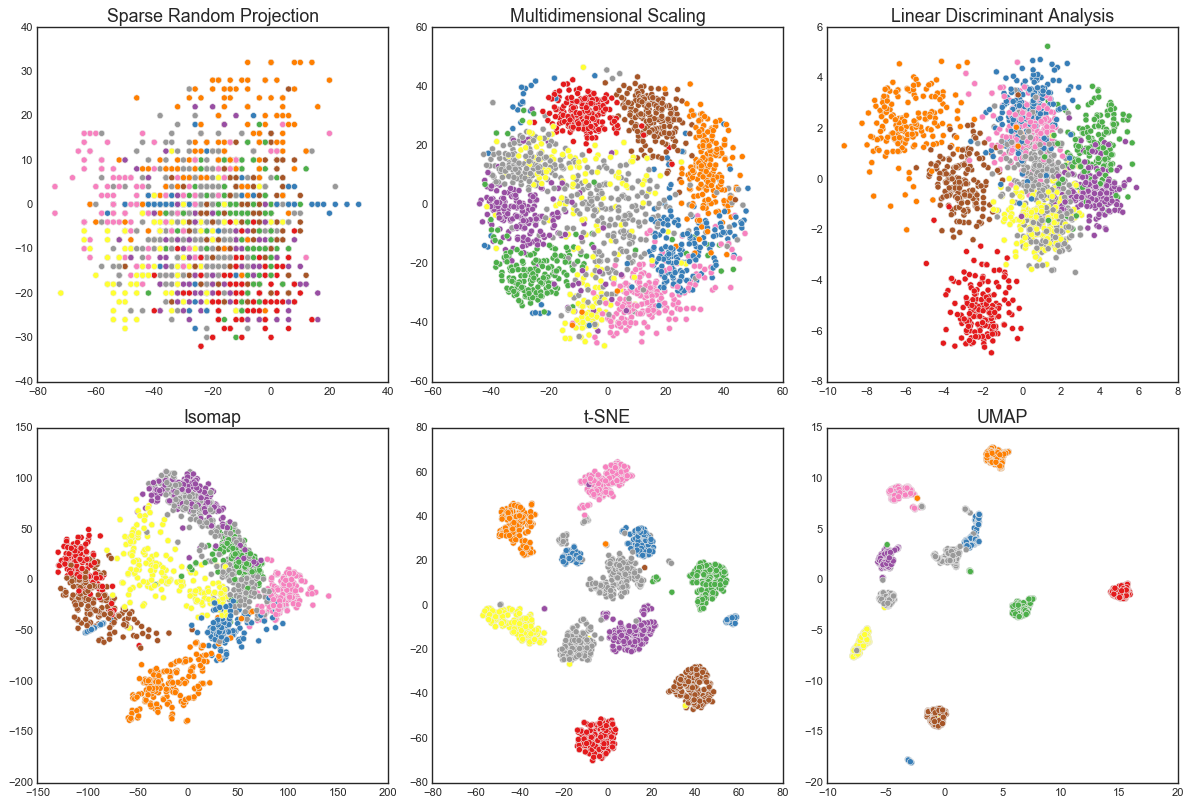

In [141]:
graph_digit_embeddings(
    digit_data, digit_class,
    {'Sparse Random Projection': srp_data2,
     'Multidimensional Scaling': mds_data2,
     'Linear Discriminant Analysis':lda_data,
     #'Spectral Embedding': spectral_data2,
     'Isomap': isomap_data2,
     #'Locally Linear Embedding': lle_data2,
     't-SNE': tsne_data2,
     'UMAP': umap_data2
    }
);

## Numerical properties

In [943]:
import primefac

SyntaxError: invalid syntax (primefac.py, line 601)

In [944]:
from itertools import chain, cycle, accumulate # last of which is Python 3 only
 
def factors(n):
    def prime_powers(n):
        # c goes through 2, 3, 5, then the infinite (6n+1, 6n+5) series
        for c in accumulate(chain([2, 1, 2], cycle([2,4]))):
            if c*c > n: break
            if n%c: continue
            d,p = (), c
            while not n%c:
                n,p,d = n//c, p*c, d + (p,)
            yield(d)
        if n > 1: yield((n,))
 
    r = [1]
    for e in prime_powers(n):
        r += [a*b for a in r for b in e]
    return r

In [955]:
from scipy.sparse import csr_matrix

In [965]:
factors(3)

[1, 3]

In [980]:
A = np.array([[0,0,0,0]])
A[:,np.array([1,2])]

array([[0, 0]])

In [1003]:
maxnum = int(10e3)
maxfactor = int(np.sqrt(maxnum))
arr = np.zeros((maxnum, maxfactor))
import scipy

In [1024]:
%%time
import math
from functools import reduce
def code_factors(x):
    arr = csr_matrix(np.zeros((1,maxnum)))
    facts = np.array(factors(x))-1
    arr[:,facts] = 1
    return arr

maxnum = 1000
maxfactor = math.ceil(np.sqrt(maxnum))

factor_array = reduce(
    lambda x, y: scipy.sparse.vstack((x, y)), 
    map(code_factors, range(1,maxnum+1))
);

CPU times: user 782 ms, sys: 7.38 ms, total: 789 ms
Wall time: 866 ms


In [1019]:
def graph_factor_embeddings(raw_data, digit_class, embeddings):
    fig = plt.figure(figsize=(15,15))
    # Plot each of the embeddings
    for i, (title, embedding) in enumerate(embeddings.items()):
        ax = fig.add_subplot(3, 3, i+1)
        ax.scatter(
            embedding[:,0], embedding[:,1], 
            c = digit_class, s = 30, cmap='Blues', alpha=1
        );
        ax.set_title(title, fontdict={'fontsize': 16})
    plt.tight_layout()

In [1030]:
srp3 = SparseRandomProjection(n_components=2)
srp_factor = srp3.fit_transform(factor_array.todense())

In [1032]:
isomap3 = Isomap(
    n_components=2,
    n_neighbors=5, 
);
isomap_factor = isomap3.fit_transform(factor_array.todense())

In [1034]:
umap_obj3 = UMAP()
umap_factor = umap_obj3.fit_transform(factor_array.todense())

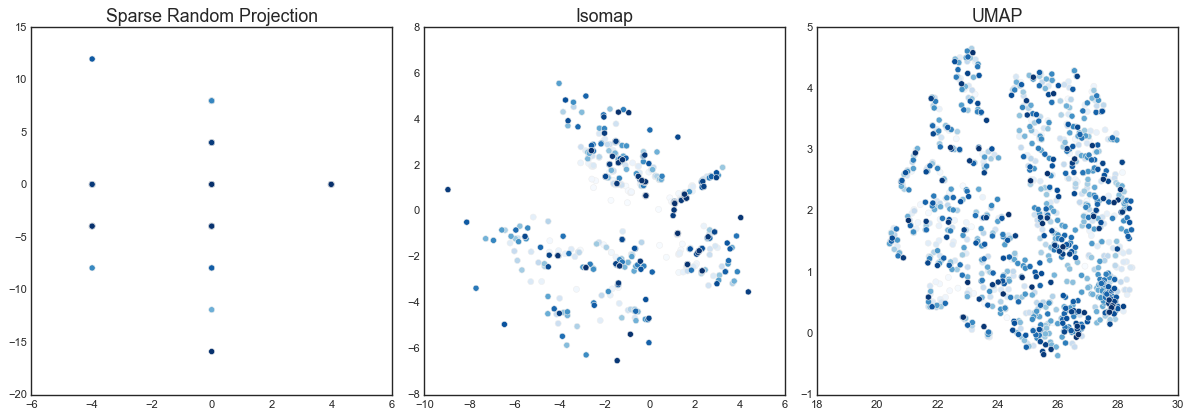

In [1035]:
graph_factor_embeddings(
    factor_array, np.array(range(1,maxnum+1)),
    {
    'Sparse Random Projection': srp_factor,
     #'Multidimensional Scaling': mds_data2,
     #'Linear Discriminant Analysis':lda_data,
     #'Spectral Embedding': spectral_data2,
     'Isomap': isomap_factor,
     #'Locally Linear Embedding': lle_data2,
     #'t-SNE': tsne_data2,
     'UMAP': umap_factor
    }
);

## FP in numpy

In [265]:
a = np.random.randint(0, 10 + 1, size=(3, 3, 3, 3, 3))
b = np.random.randint(0, 5 + 1, size=(2,3,3))
c = np.random.randint(0, 5 + 1, size=(2,3))
c

array([[2, 5, 2],
       [4, 1, 0]])

In [270]:
 def my_func(vect, ax):
    print(vect)
    if ax % 2 == 0:
        print(np.sum(vect, keepdims=True))
        return np.sum(vect, keepdims=True)
    else:
        print(vect / 10)
        return vect / 10
    
np.apply_along_axis(func1d=my_func, axis=0, arr=c, ax=0)

[2 4]
[6]
[5 1]
[6]
[2 0]
[2]


array([[6, 6, 2]])

In [269]:
my_func_ax = lambda a, ax: np.apply_along_axis(
    func1d = my_func, axis = ax, arr = a, ax = ax
);
np.apply_over_axes(func=my_func_ax, a=c, axes=[0, 1])

[2 4]
[6]
[5 1]
[6]
[2 0]
[2]
[6 6 2]
[0.6 0.6 0.2]


array([[0.6, 0.6, 0.2]])

## Monte Carlo Simulation

In [439]:
roll_counts = np.zeros(11)
turns = 15*4
for _ in range(turns):
    x = np.random.randint(low=1, high=6+1)
    y = np.random.randint(low=1, high=6+1)
    roll = x + y
    roll_counts[roll-2] += 1

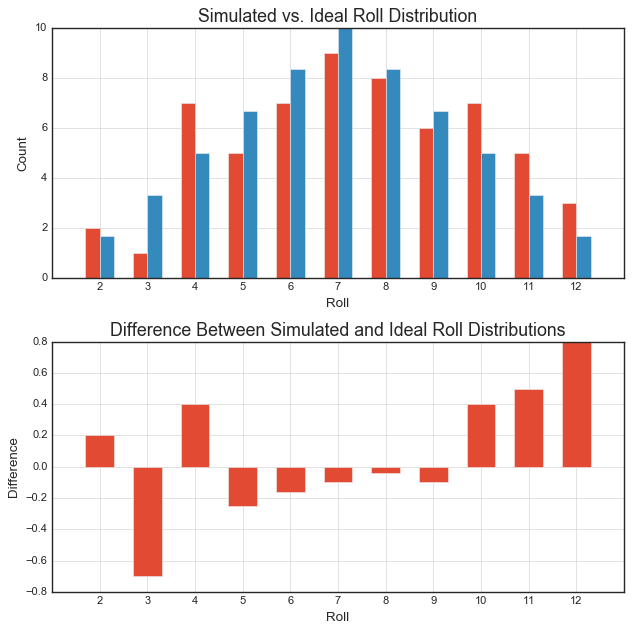

In [440]:
fig, axes = plt.subplots(2,1,figsize=(8,8))

rolls = np.arange(2,13)
ideal = (np.array([1,2,3,4,5,6,5,4,3,2,1]) * turns/36)

width = 0.3
shift = width/2

axes[0].bar(rolls-shift, roll_counts, width=width)
axes[0].bar(rolls+shift, ideal, width=width)
axes[0].grid()
axes[0].set_title('Simulated vs. Ideal Roll Distribution', fontdict={'fontsize': 16})
axes[0].set(xlabel='Roll', ylabel= 'Count', xticks=rolls, xlim=(1,13))

axes[1].bar(rolls, (roll_counts - ideal)/ideal,  width=width*2)
axes[1].grid()
axes[1].set_title('Difference Between Simulated and Ideal Roll Distributions', fontdict={'fontsize': 16})
axes[1].set(xlabel='Roll', ylabel= 'Difference', xticks=rolls, xlim=(1,13))

plt.tight_layout()